In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib


In [2]:
df = pd.read_csv("spg.csv")  # Make sure this file is in the same folder
df.head()


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [3]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [4]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [5]:
df.shape


(4213, 21)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2_m_above_gnd,4213.0,15.068111,8.853677,-5.350000,8.390000,14.750000,21.290000,34.90000
relative_humidity_2_m_above_gnd,4213.0,51.361025,23.525864,7.000000,32.000000,48.000000,70.000000,100.00000
mean_sea_level_pressure_MSL,4213.0,1019.337812,7.022867,997.500000,1014.500000,1018.100000,1023.600000,1046.80000
total_precipitation_sfc,4213.0,0.031759,0.170212,0.000000,0.000000,0.000000,0.000000,3.20000
snowfall_amount_sfc,4213.0,0.002808,0.038015,0.000000,0.000000,0.000000,0.000000,1.68000
total_cloud_cover_sfc,4213.0,34.056990,42.843638,0.000000,0.000000,8.700000,100.000000,100.00000
high_cloud_cover_high_cld_lay,4213.0,14.458818,30.711707,0.000000,0.000000,0.000000,9.000000,100.00000
medium_cloud_cover_mid_cld_lay,4213.0,20.023499,36.387948,0.000000,0.000000,0.000000,10.000000,100.00000
low_cloud_cover_low_cld_lay,4213.0,21.373368,38.013885,0.000000,0.000000,0.000000,10.000000,100.00000
shortwave_radiation_backwards_sfc,4213.0,387.759036,278.459293,0.000000,142.400000,381.810000,599.860000,952.30000


In [9]:
df.duplicated().sum()

np.int64(0)

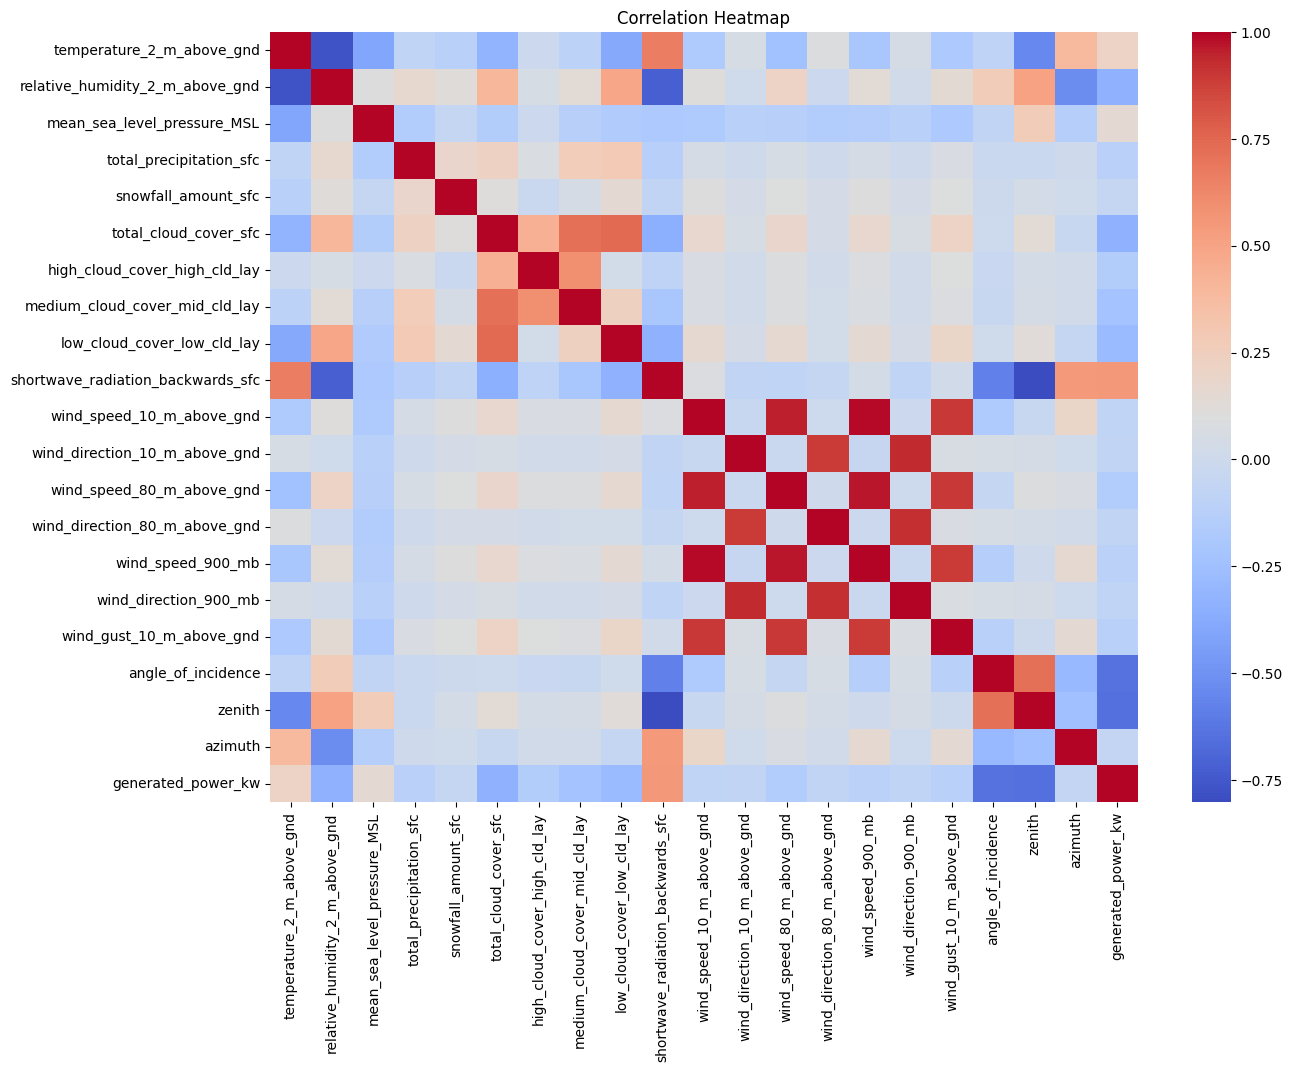

In [7]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# Drop the target column to get features
X = df.drop(columns=["generated_power_kw"])
y = df["generated_power_kw"]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=150, random_state=42)

In [13]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Mean Absolute Error (MAE):", mae)
print("📊 Root Mean Squared Error (RMSE):", rmse)
print("📈 R² Score:", r2)


📊 Mean Absolute Error (MAE): 254.78746857245886
📊 Root Mean Squared Error (RMSE): 405.80983761687855
📈 R² Score: 0.8197173984604944


In [14]:
joblib.dump(model, "solar_power_model.pkl")


['solar_power_model.pkl']

In [16]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [24]:
%%writefile sample.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model
model = joblib.load("solar_power_model.pkl")

# Page config
st.set_page_config(page_title="🔆 Solar Power Forecast", page_icon="☀️", layout="centered")

# Custom CSS styling
st.markdown("""
    <style>
    .main {
        background-color: #f7f9fc;
    }
    .stApp {
        background: linear-gradient(to bottom right, #fdfcfb, #e2d1c3);
    }
    .title {
        font-size: 38px;
        font-weight: bold;
        color: #FF7F50;
    }
    .subtitle {
        font-size: 18px;
        color: #444;
        margin-top: -10px;
    }
    .stTextInput > div > div > input {
        background-color: #fff7f5;
        color: #000;
    }
    .stButton>button {
        background-color: #FF7F50;
        color: white;
        font-weight: bold;
        border-radius: 12px;
        padding: 8px 20px;
    }
    .stSuccess {
        background-color: #d4edda !important;
        color: #155724 !important;
    }
    </style>
""", unsafe_allow_html=True)

# Header
st.markdown('<p class="title">🔆 Solar Power Generation Predictor</p>', unsafe_allow_html=True)
st.markdown('<p class="subtitle">Enter the weather conditions to estimate solar power output (in kW)</p>', unsafe_allow_html=True)

# Input features
feature_names = [
    "temperature_2_m_above_gnd",
    "relative_humidity_2_m_above_gnd",
    "mean_sea_level_pressure_MSL",
    "total_precipitation_sfc",
    "snowfall_amount_sfc",
    "total_cloud_cover_sfc",
    "high_cloud_cover_high_cld_lay",
    "medium_cloud_cover_mid_cld_lay",
    "low_cloud_cover_low_cld_lay",
    "shortwave_radiation_backwards_sfc",
    "wind_speed_10_m_above_gnd",
    "wind_direction_10_m_above_gnd",
    "wind_speed_80_m_above_gnd",
    "wind_direction_80_m_above_gnd",
    "wind_speed_900_mb",
    "wind_direction_900_mb",
    "wind_gust_10_m_above_gnd",
    "angle_of_incidence",
    "zenith",
    "azimuth"
]

# Input section
st.markdown("---")
st.subheader("🔢 Input Weather Data")
user_input = []
cols = st.columns(2)

for idx, feature in enumerate(feature_names):
    value = cols[idx % 2].text_input(f"{feature.replace('_', ' ').capitalize()}:", value="0.0")
    try:
        user_input.append(float(value))
    except ValueError:
        st.error(f"Please enter a valid number for {feature}")

# Predict
st.markdown("---")
if st.button("📈 Predict Power Generation"):
    input_array = np.array(user_input).reshape(1, -1)
    prediction = model.predict(input_array)[0]
    st.success(f"✅ Predicted Solar Power Output: **{prediction:.2f} kW**")


Overwriting sample.py


In [19]:
!pip install streamlit --quiet

In [20]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 5s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [25]:
!streamlit run sample.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.176.186:8501

⠴⠦your url is: https://nine-banks-jog.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
  Stopping...
^C
